<a href="https://colab.research.google.com/github/Pengyu-gis/Historical-Aerial-Photos/blob/main/Historical_sam2_text_prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmenting remote sensing imagery with text prompts and the Segment Anything Model 2 (SAM 2)


In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

  Created wheel for sam2: filename=sam2-0.4.1-cp310-cp310-linux_x86_64.whl size=425004 sha256=533af6fecfbde49d2ae2d06328a8a2c66a39e1a65bf145330650c427a84174a1
  Stored in directory: /root/.cache/pip/wheels/f7/24/19/6ae406a45571a7fed8ef81297fc11698486638ac21200cdafa
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=4ca54db216d9a837834f12f12c20fbe4b647c6f719c64a7f1a4e454afcaf73ed
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=34e6ed7317a93ca288b6950ddb8c1ef7b3a479d731ff66431602d916d9fdbedc
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built groundingdino-py sam2 antlr4-python3-runtime iopath


In [ ]:
image = '/content/patch_10.tif'

Display the downloaded image on the map.

In [ ]:
sam = LangSAM(model_type="sam2-hiera-large")

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

sam2_hiera_large.pt:   0%|          | 0.00/898M [00:00<?, ?B/s]

In [ ]:
text_prompt = "house"

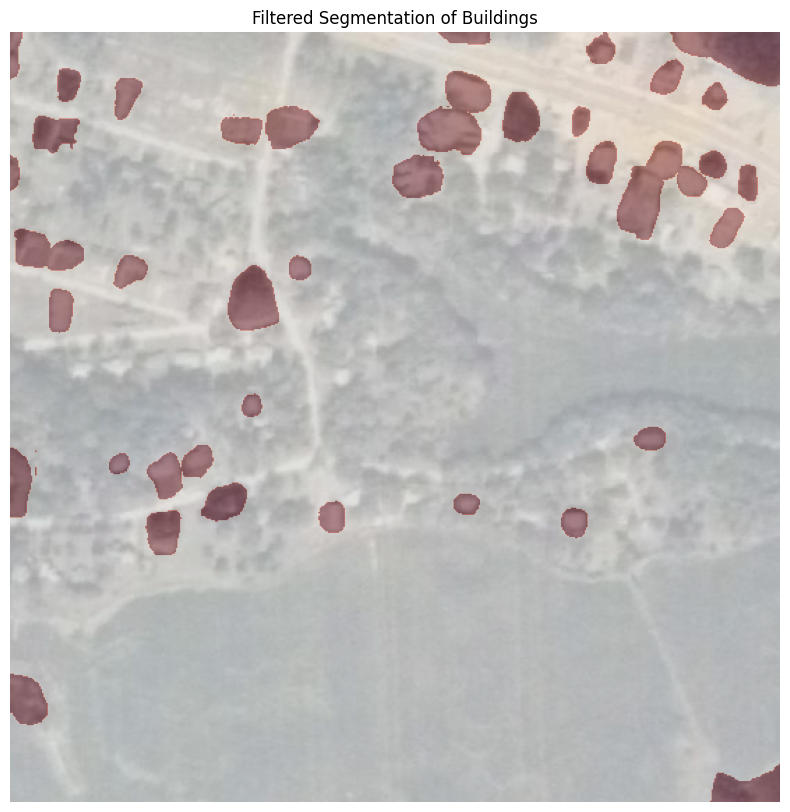

In [ ]:
import numpy as np

# Define the detection filter
def area_filter(box, mask, logit, phrase, index):
    """
    Filter detections by area and bounding box size.
    Exclude objects larger than 1000 square meters.
    """
    # Calculate area from the mask
    area = np.sum(mask)  # Count non-zero pixels in the mask
    pixel_to_meter_ratio = 0.5  # Adjust based on your image resolution
    area_in_meters = area * pixel_to_meter_ratio

    # Apply area filter
    return area_in_meters <= 1000

# Run prediction with the area filter
sam.predict(
    image,
    text_prompt,
    box_threshold=0.05,
    text_threshold=0.3,
    detection_filter=area_filter,  # Apply the detection filter
)

# Visualize the predictions
sam.show_anns(
    cmap="Reds",
    box_color=None,
    title="Filtered Segmentation of Buildings",
    blend=True,
)

## Visualize the results

Show the result with bounding boxes on the map.

Show the result as a grayscale image.

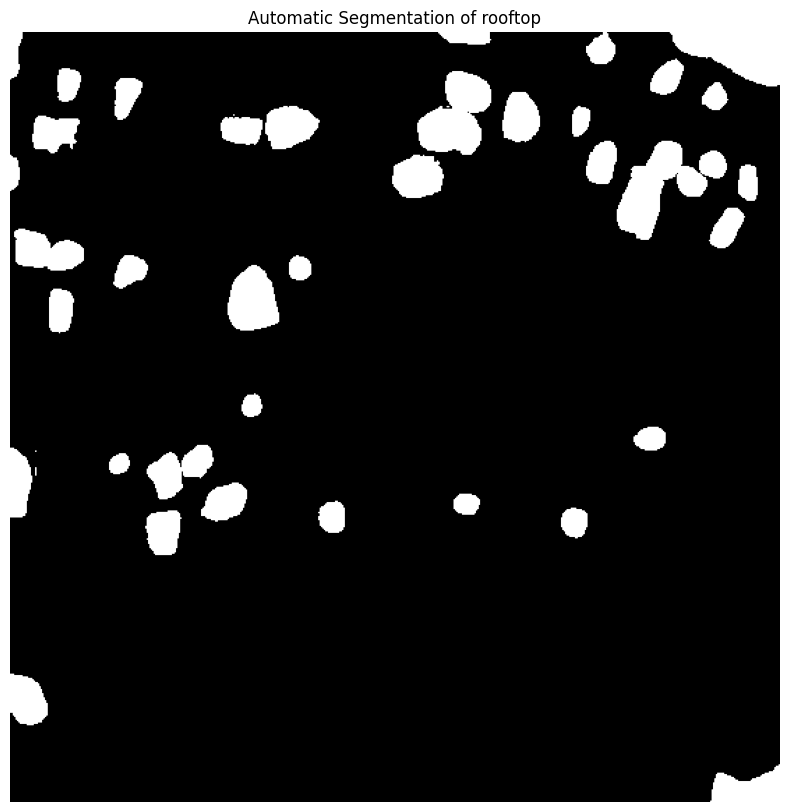

In [ ]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of rooftop",
    blend=False,
    output="rooftop.tif",
)

Convert the result to a vector format.  

In [ ]:
da, gdf = sam.region_groups(
    image="rooftop.tif",
    min_size=100,
    out_csv="objects.csv",
    out_image="objects.tif",
    out_vector="objects.gpkg",
)